In [1]:
# 현재 주피터노트북 위치 확인
import os
os.getcwd()

'c:\\pythondata'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

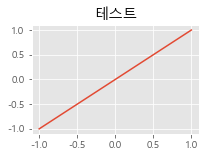

In [3]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 스타일
plt.style.use('ggplot')

# 그래프 출력 확인
plt.figure(figsize=(3,2))
plt.plot([-1,0,1],[-1,0,1])
plt.title('테스트')
plt.show()

# data 불러오기
* **`pd.read_csv(csv파일 경로, parse_dates=[datetime형식으로 불러올 컬럼])`**

* 속성 정보
    * https://www.kaggle.com/competitions/bike-sharing-demand/data 
    * `datetime` - hourly date + timestamp  
    * `season`  - 1 = spring, 2 = summer, 3 = fall, 4 = winter 
    * `holiday` - whether the day is considered a holiday
    * `workingday` - whether the day is neither a weekend nor holiday
    * `weather` 
        * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    * `temp` - temperature in Celsius
    * `atemp` - "feels like" temperature in Celsius
    * `humidity` - relative humidity
    * `windspeed` - wind speed
    * `casual` - number of non-registered user rentals initiated
    * `registered` - number of registered user rentals initiated
    * `count` - number of total rentals

In [101]:
# datetime 컬럼은 datetime 형식으로 읽어오도록 옵션 설정
df = pd.read_csv('data/train.csv', parse_dates=['datetime'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [102]:
# 데이터의 크기 확인 
df.shape

(10886, 12)

In [103]:
# 자료형 확인
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

## dataframe 정보

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## 결측치 확인

In [105]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# 파생변수 생성
* year, month, day, dayofweek, day_name(), hour

In [106]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['dayofweek'] = df['datetime'].dt.dayofweek
df['dayname'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,dayname,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,2,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,2,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,2,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,2,Wednesday,22


# 컬럼 별 데이터 확인

In [107]:
df[['season', 'month']].drop_duplicates()

,season,month
0,1,1
431,1,2
877,1,3
1323,2,4
1778,2,5
2234,2,6
2690,3,7
3146,3,8
3602,3,9
4055,4,10


In [108]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

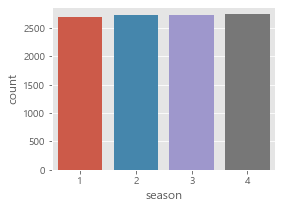

In [109]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='season')
plt.show()

In [110]:
df['temp']

0         9.84
1         9.02
2         9.02
3         9.84
4         9.84
         ...  
10881    15.58
10882    14.76
10883    13.94
10884    13.94
10885    13.12
Name: temp, Length: 10886, dtype: float64

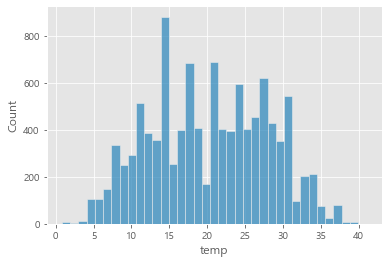

In [153]:
sns.histplot(data=df, x="temp")
plt.show()

# 대여량 분석

In [113]:

dayname_count_mean = df.groupby('dayname')['count'].mean().reset_index()
dayname_count_mean

,dayname,count
0,Friday,197.844343
1,Monday,190.390716
2,Saturday,196.665404
3,Sunday,180.839772
4,Thursday,197.296201
5,Tuesday,189.723847
6,Wednesday,188.411348


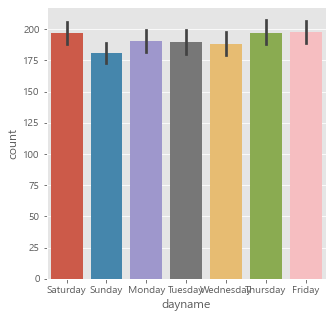

In [147]:
# 요일별 대여량 막대
plt.figure(figsize=(5,5))
sns.barplot(x='dayname', y='count', data=df)
plt.show()

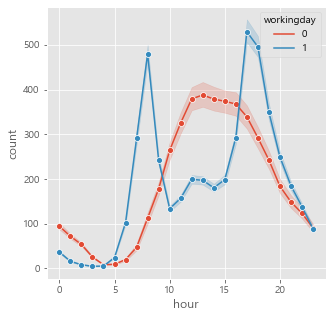

In [148]:
# 시간대별 대여량 꺾은선
#hourly_rentals_mean = df.groupby('hour')['count'].mean().reset_index()
plt.figure(figsize=(5,5))
sns.lineplot(x='hour', y='count', data=df, marker='o', hue='workingday')
plt.show()

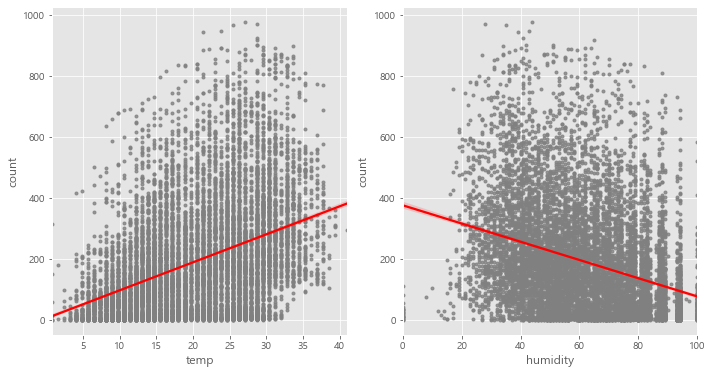

In [141]:
# 기온별 대여량 산점도
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.regplot(data = df, x = "temp", y = "count", color='gray', line_kws={'color':'red'}, marker='.')
plt.subplot(2, 2, 2)
sns.regplot(data = df, x = "humidity", y = "count", color='gray', line_kws={'color':'red'}, marker='.')
plt.tight_layout()
plt.show()

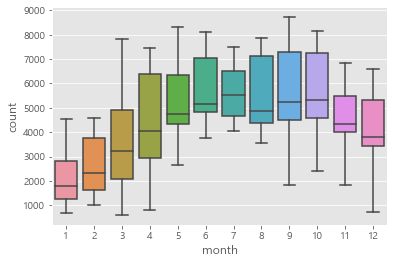

In [149]:
# 월별 하루 총 대여량
daily_count_sum = df.groupby(['year','month','day'])['count'].sum().reset_index()
sns.boxplot(data = daily_count_sum,x='month', y = "count")
plt.show()

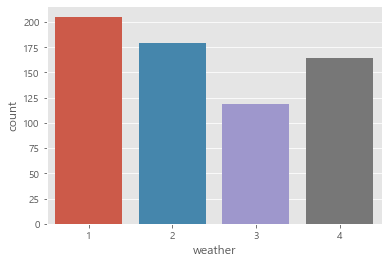

In [150]:
weather_count_mean = df.groupby('weather')['count'].mean().reset_index()
sns.barplot(data = weather_count_sum,x='weather', y = "count")
plt.show()

In [121]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
df[df['weather'] == 4]



In [122]:
holiday_count_mean = df.groupby('holiday')['count'].mean().reset_index()
holiday_count_mean

,holiday,count
0,0,191.741655
1,1,185.877814


In [133]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,dayname,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,2,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,2,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,2,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,2,Wednesday,22


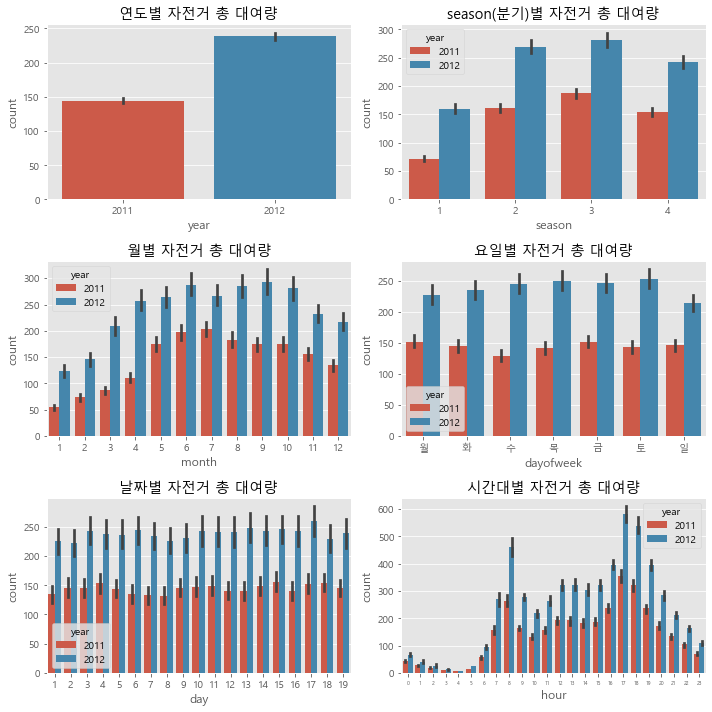

In [138]:
row = 3
col = 2
i = 0

plt.figure(figsize=(10,10))

i+=1
plt.subplot(row,col,i)
sns.barplot(data=df, x='year', y='count')
plt.title('연도별 자전거 총 대여량')

i+=1
plt.subplot(row,col,i)
sns.barplot(data=df, x='season', y='count', hue='year')
plt.title('season(분기)별 자전거 총 대여량')

i+=1
plt.subplot(row,col,i)
sns.barplot(data=df, x='month', y='count', hue='year')
plt.title('월별 자전거 총 대여량')

i+=1
plt.subplot(row,col,i)
sns.barplot(data=df, x='dayofweek', y='count', hue='year')
plt.title('요일별 자전거 총 대여량')
plt.xticks(range(7), ['월','화','수','목','금','토','일'])

i+=1
plt.subplot(row,col,i)
sns.barplot(data=df, x='day', y='count', hue='year')
plt.title('날짜별 자전거 총 대여량')

i+=1
plt.subplot(row,col,i)
sns.barplot(data=df, x='hour', y='count', hue='year')
plt.title('시간대별 자전거 총 대여량')
plt.xticks(size=5)

plt.tight_layout()
plt.show()

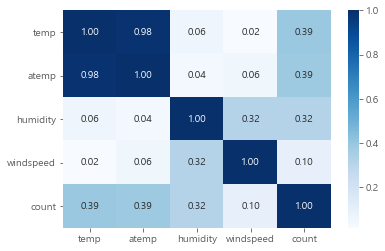

In [152]:
corr_matt = ['temp','atemp','humidity','windspeed','count']
corr = abs(df[corr_matt].corr())
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

# 파일 다운로드

In [155]:
# 전처리한 데이터 프레임을 csv파일로 다운로드
df.to_csv('data/bike_sharing_demand_train.csv', index=False)